# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bigcity.csv")
df

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# 2. Explore the shape of dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [41]:
df.shape
X = df["u"]
Y = df["x"]
X = X.values.reshape(len(X),1) #reshaping for making it comply with 2D
Y = Y.values.reshape(len(Y),1)

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [32]:
df.isna().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

In [33]:
df.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)


In [46]:
x_test.shape

(10, 1)

# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [58]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

b1 = regression_model.coef_[0][0]
b0 = regression_model.intercept_[0]
print("b1 is {}",b1)
print("b0 is {}",b0)

b1 is {} 1.1594512342174779
b0 is {} 9.718455322828262


# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

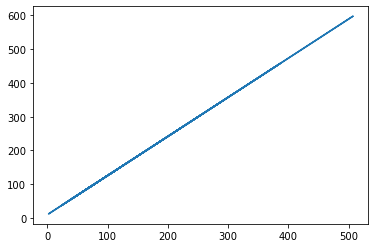

In [61]:
plt.plot(x_train,b1*x_train+b0)

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [65]:
y_pred = regression_model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
rsme = sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Root square mean error is {} and r2 score is {}".format(rsme,r2))

Root square mean error is 23.385235190249123 and r2 score is 0.9181922560396981


# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [67]:
regression_model.score(x_train,y_train)

0.9682175540860046

In [68]:
regression_model.score(x_test,y_test)

0.9181922560396981